Credit Score Classification (Deep Learning)

1. Importing the Libraries

In [185]:
### Data Wrangling 

import numpy as np
import pandas as pd
import missingno
from collections import Counter
from imblearn.over_sampling import SMOTE

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

### Modelling 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import  StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')

2. Importing the Data

In [186]:
dataset = pd.read_csv('CustomerCreditTrain.csv', encoding = 'utf-8', sep=';')

In [187]:
### Looking at the sample data in the dataset

dataset.head(10)

,Maas_Belgeli,Maas_Belgesiz,Diger_Belgesiz,Diger_Belgeli,Es_Belgeli,Es_Belgesiz,Medeni_Durum,Cinsiyet,Egitim_Durumu,Unvani,...,Talebinin_Altında_Teklif_VarMi,Son_3_Ay_Icinde_Otomatik_Ret_Basvurusu_VarMi,Son_3_Ayda_Olumsuz_Istihbarattan_Dolayi_Ret_Edilmis_Teklifi_VarMi,Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi,KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi,Yazilmis_Cek_Kontrolu_UygunMu,Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu,Ikametgah_Yili,Oturdugu_Ev_Durumu,Risk_Grubu
0,7600,0.0,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Fakülte/Lisans,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,5,Kendine Ait,İyi
1,7600,1.0,0.0,0.0,0.0,0.0,Evli ...,Kadin ...,Yüksek Lisans ...,Müdür,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,7,Kendine Ait,Çok İyi
2,18200,1.0,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Yüksek Lisans ...,Müdür,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,5,Kendine Ait,Çok İyi
3,4300,12452.0,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Fakülte/Lisans,Müdür,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,3,Diger,İyi
4,26900,10016.0,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Doktora ...,Üst Düzey Yönetici,...,NaN,NaN,NaN,NaN,Hayir,NaN,NaN,3,Kendine Ait,Çok İyi
5,5300,1.0,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Fakülte/Lisans,Üst Düzey Yönetici,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,6,Kendine Ait,İyi
6,10300,2575.0,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Fakülte/Lisans,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,10,Kendine Ait,Çok İyi
7,9200,1.0,0.0,0.0,0.0,0.0,Bekar ...,Erkek ...,Yüksek Lisans ...,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,6,Kendine Ait,İyi
8,28300,0.0,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Fakülte/Lisans,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,10,Kendine Ait,Çok İyi
9,29700,40000.0,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Fakülte/Lisans,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,14,Kendine Ait,Çok İyi


In [188]:
### Shape of the Dataset

dataset.shape

(16151, 25)

3. Exploratory Data Analysis (EDA)

3.1 Datatypes, Missing Data, and Summary Statistics

In [189]:
### Summary statistics of the numerical columns in the dataset

dataset.describe()

,Maas_Belgeli,Maas_Belgesiz,Diger_Belgesiz,Diger_Belgeli,Es_Belgeli,Es_Belgesiz,Yas,Ikametgah_Yili
count,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000
mean,7744.517367,5573.832312,857.688628,501.872277,162.489378,177.751423,42.575135,6.897034
std,7835.848525,11296.064661,11965.262079,10323.298486,4579.718933,4434.570168,9.652079,5.419194
min,0.000000,-16000.000000,0.000000,0.000000,0.000000,0.000000,19.000000,-1.000000
25%,2300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,35.000000,4.000000
50%,4600.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,41.000000,5.000000
75%,9300.000000,7133.235000,0.000000,0.000000,0.000000,0.000000,48.000000,10.000000
max,32000.000000,700000.000000,1000000.000000,1000000.000000,500000.000000,500000.000000,89.000000,77.000000


In [190]:
dataset.Medeni_Durum = dataset.Medeni_Durum.astype('category')
dataset.Cinsiyet = dataset.Cinsiyet.astype('category')
dataset.Egitim_Durumu = dataset.Egitim_Durumu.astype('category')
dataset.Unvani = dataset.Unvani.astype('category')
dataset.Meslegi = dataset.Meslegi.astype('category')
dataset.Sektor = dataset.Sektor.astype('category')
dataset.Dogdugu_Ulke = dataset.Dogdugu_Ulke.astype('category')
dataset.Askerlik_Durumu = dataset.Askerlik_Durumu.astype('category')

In [191]:
### Looking at the modified datatypes of the data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16151 entries, 0 to 16150
Data columns (total 25 columns):
 #   Column                                                             Non-Null Count  Dtype   
---  ------                                                             --------------  -----   
 0   Maas_Belgeli                                                       16151 non-null  int64   
 1   Maas_Belgesiz                                                      16151 non-null  float64 
 2   Diger_Belgesiz                                                     16151 non-null  float64 
 3   Diger_Belgeli                                                      16151 non-null  float64 
 4   Es_Belgeli                                                         16151 non-null  float64 
 5   Es_Belgesiz                                                        16151 non-null  float64 
 6   Medeni_Durum                                                       16151 non-null  category
 7   Cinsiyet     

In [192]:
### Missing data by columns in the dataset

dataset.isnull().sum().sort_values(ascending = False)

Unvani                                                               9938
Sektor                                                                895
Yazilmis_Cek_Kontrolu_UygunMu                                         446
Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi               446
Son_3_Ayda_Olumsuz_Istihbarattan_Dolayi_Ret_Edilmis_Teklifi_VarMi     446
Son_3_Ay_Icinde_Otomatik_Ret_Basvurusu_VarMi                          446
Talebinin_Altında_Teklif_VarMi                                        446
Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu                   384
Maas_Belgeli                                                            0
Askerlik_Durumu                                                         0
Oturdugu_Ev_Durumu                                                      0
Ikametgah_Yili                                                          0
KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi                              0
Dogdugu_Ulke                          

<Axes: >

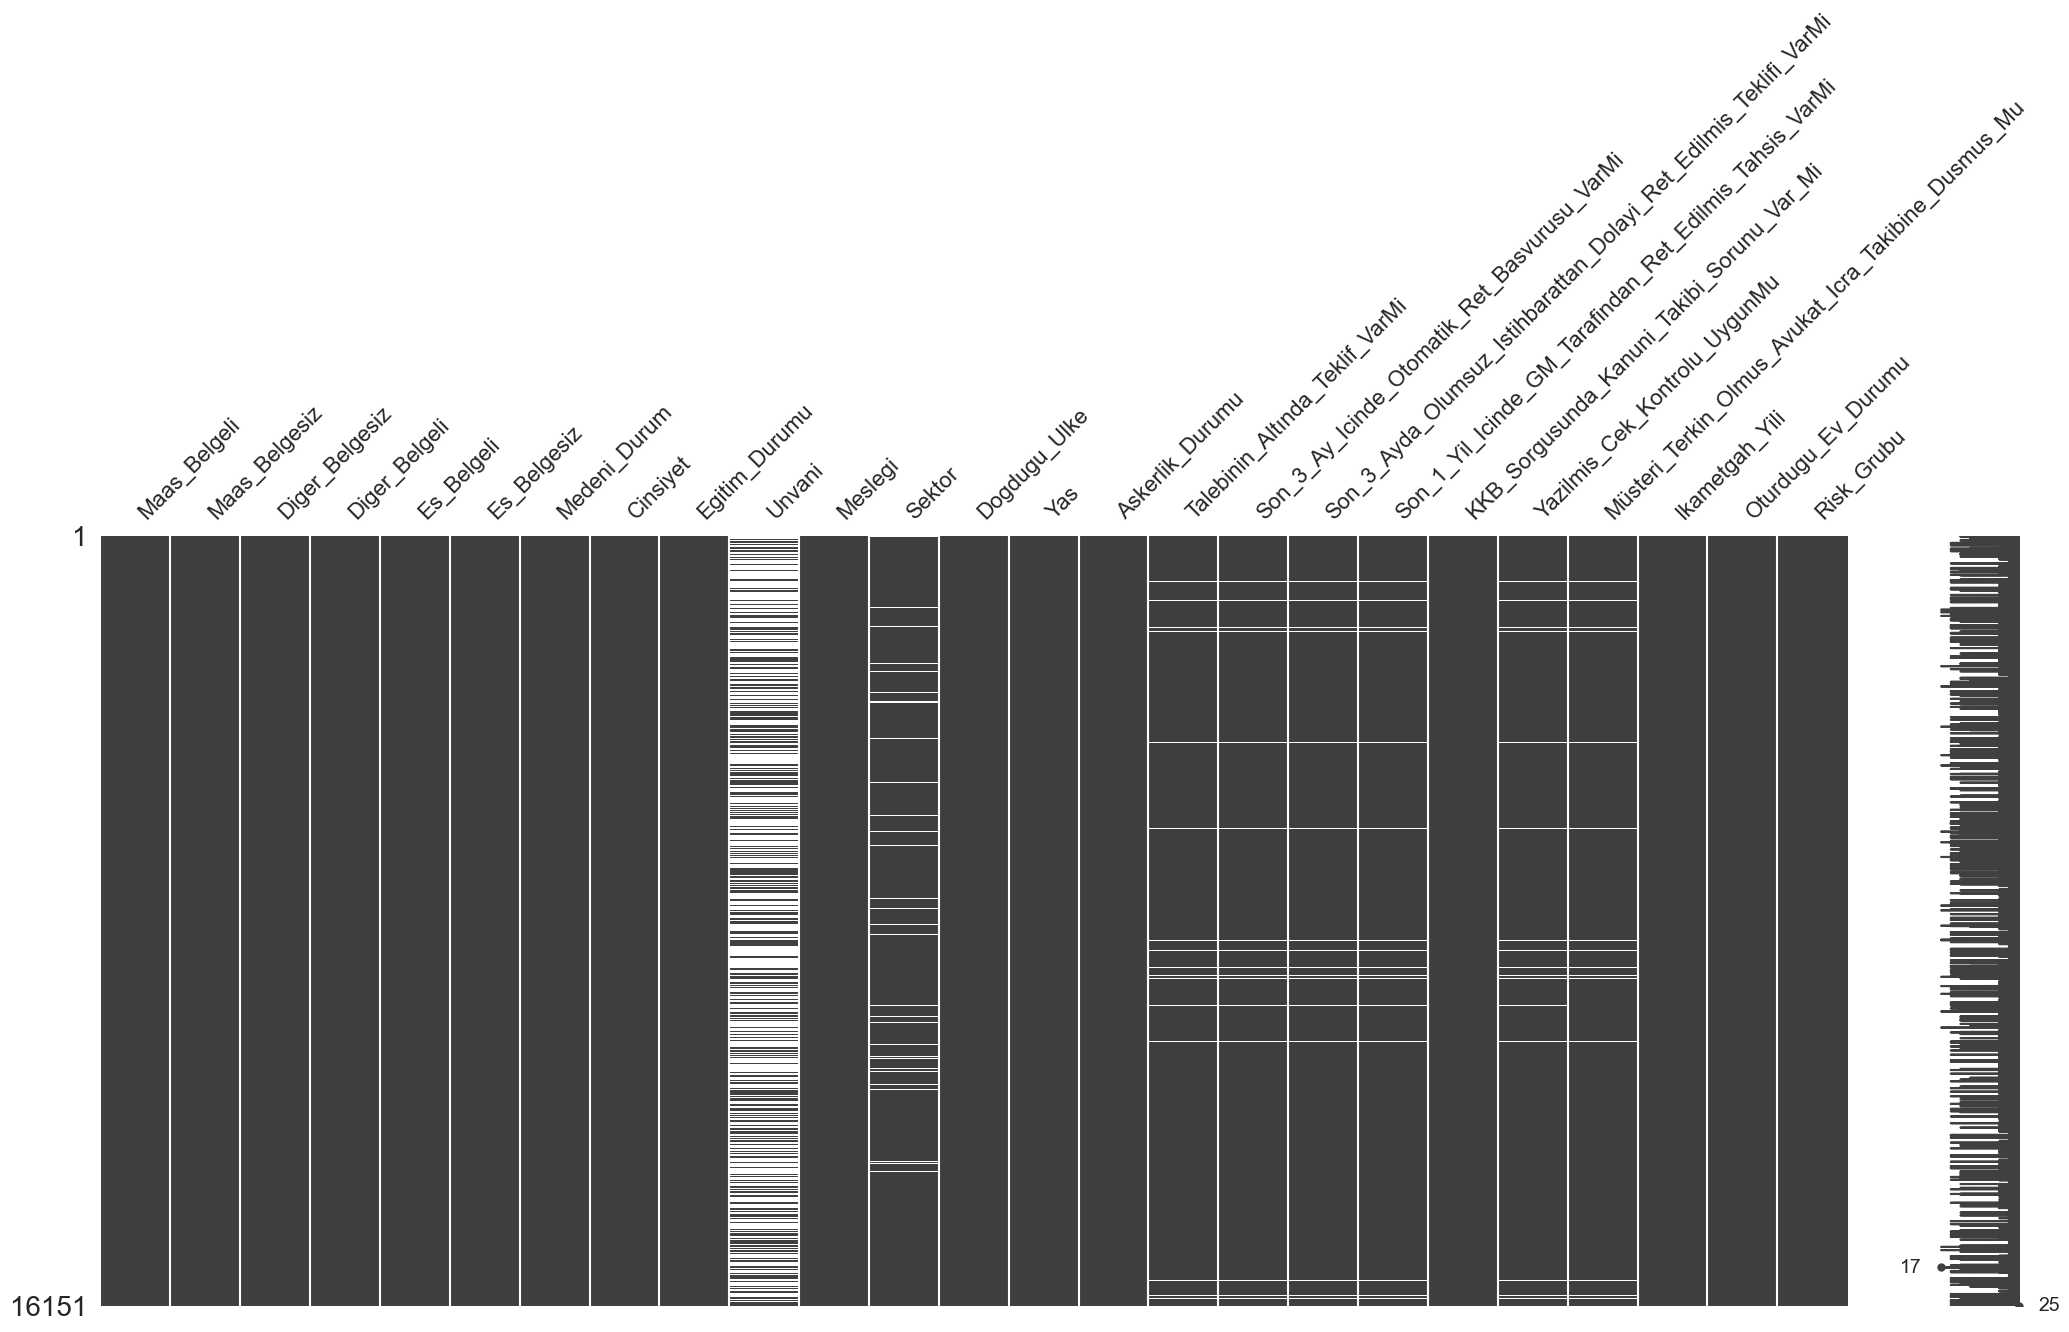

In [193]:
### Visual representation of the missing data in the dataset

missingno.matrix(dataset)

In [194]:
### Summary statistics of the numerical columns in the dataset

dataset.describe()

,Maas_Belgeli,Maas_Belgesiz,Diger_Belgesiz,Diger_Belgeli,Es_Belgeli,Es_Belgesiz,Yas,Ikametgah_Yili
count,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000
mean,7744.517367,5573.832312,857.688628,501.872277,162.489378,177.751423,42.575135,6.897034
std,7835.848525,11296.064661,11965.262079,10323.298486,4579.718933,4434.570168,9.652079,5.419194
min,0.000000,-16000.000000,0.000000,0.000000,0.000000,0.000000,19.000000,-1.000000
25%,2300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,35.000000,4.000000
50%,4600.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,41.000000,5.000000
75%,9300.000000,7133.235000,0.000000,0.000000,0.000000,0.000000,48.000000,10.000000
max,32000.000000,700000.000000,1000000.000000,1000000.000000,500000.000000,500000.000000,89.000000,77.000000


3.2 Feature Analysis

In [195]:
### Value counts of the column - Medeni Durum

medeni_durum_count = dataset['Medeni_Durum'].value_counts(dropna = False)
medeni_durum_count

Medeni_Durum
Evli                                                                                                   13699
Bekar                                                                                                   1804
Bosanmis                                                                                                 513
Dul                                                                                                      135
Name: count, dtype: int64

Text(0.5, 0, 'Medeni Durum')

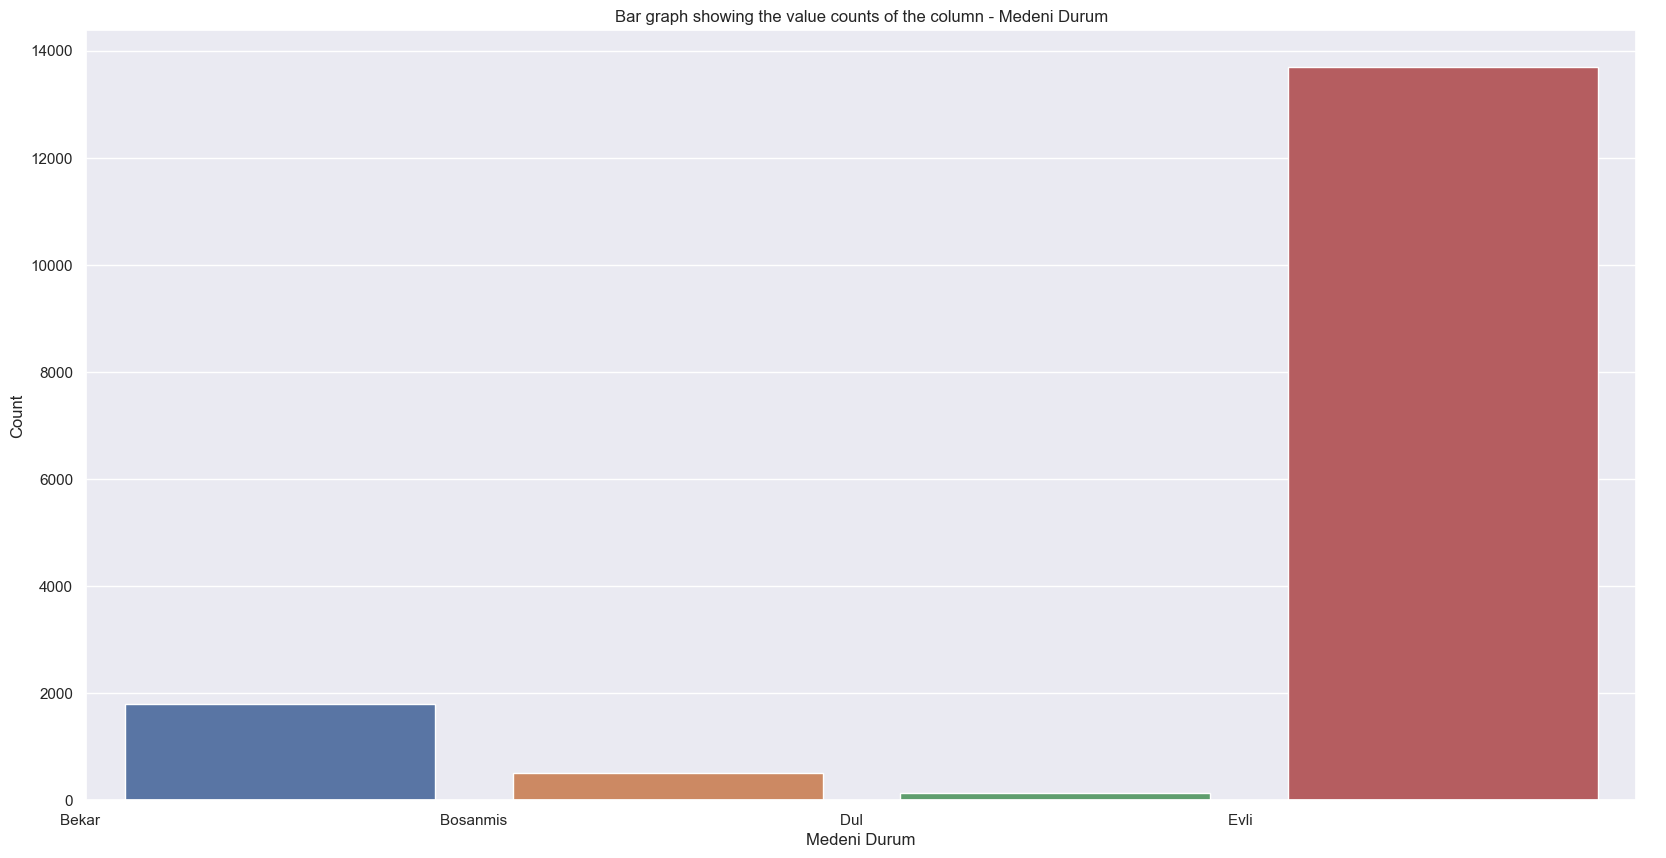

In [196]:
### Bar graph showing the value counts of the column - Medeni Durum

sns.set(rc = {'figure.figsize': (20, 10)})
sns.barplot(x=medeni_durum_count.index,y= medeni_durum_count.values)
plt.title('Bar graph showing the value counts of the column - Medeni Durum')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Medeni Durum', fontsize = 12)

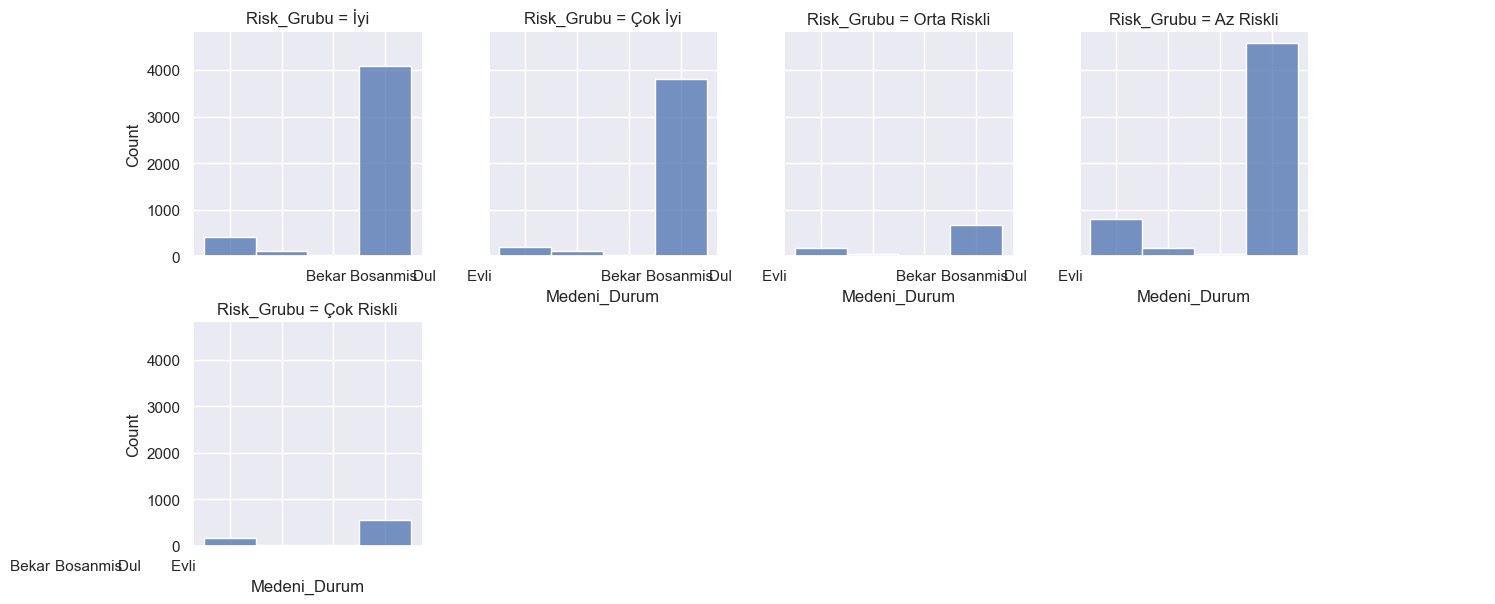

In [197]:
### Distribution of Risk Durumu for each Medeni Durum

g= sns.FacetGrid(col='Risk_Grubu', col_wrap = 4, data = dataset)
g.map(sns.histplot, 'Medeni_Durum')

In [198]:
## See detail of Unvan 

index_values = ~dataset['Unvani'].isnull().values
Unvan_data = list(dataset['Unvani'][index_values])
Unvan_data

['Müdür',
 'Müdür',
 'Müdür',
 'Üst Düzey Yönetici',
 'Üst Düzey Yönetici',
 'Orta Düzey Yönetici',
 'Yetkili',
 'Orta Düzey Yönetici',
 'Müdür',
 'Yetkili',
 'Yetkili',
 'Müdür Yrd. ',
 'Müdür',
 'Müdür',
 'Yetkili',
 'Müdür',
 'Üst Düzey Yönetici',
 'Uzman ',
 'Üst Düzey Yönetici',
 'Yetkili',
 'Üst Düzey Yönetici',
 'Yetkili',
 'Uzman ',
 'Müdür',
 'Orta Düzey Yönetici',
 'Yetkili',
 'Müdür Yrd. ',
 'Müdür Yrd. ',
 'Müdür',
 'Müdür',
 'Uzman ',
 'Memur ',
 'Üst Düzey Yönetici',
 'Uzman ',
 'Müdür',
 'Müdür',
 'Memur ',
 'Müdür Yrd. ',
 'Müdür Yrd. ',
 'Üst Düzey Yönetici',
 'Üst Düzey Yönetici',
 'Yrd. Doç.',
 'Üst Düzey Yönetici',
 'Yetkili',
 'Müdür Yrd. ',
 'Müdür',
 'Müdür Yrd. ',
 'Yetkili',
 'Uzman ',
 'Uzman ',
 'Müdür',
 'Müdür',
 'Uzman ',
 'Orta Düzey Yönetici',
 'Müdür',
 'Profesör',
 'Arastirma Görevlisi',
 'Orta Düzey Yönetici',
 'Yetkili',
 'Üst Düzey Yönetici',
 'Üst Düzey Yönetici',
 'Uzman Doktor',
 'Üst Düzey Yönetici',
 'Müdür Yrd. ',
 'Müdür',
 'Uzman ',
 'Üst Dü

In [199]:
### Create a dictionary to store the counts of all the various Unvan types

unvan_type_dict = dict()
for value in Unvan_data:
    values = value.split(',')
    for each_value in values:
        loan_type = each_value.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in unvan_type_dict:
            unvan_type_dict[loan_type] += 1
        else:
            unvan_type_dict[loan_type] = 1

unvan_type_dict

{'Müdür': 1074,
 'Üst Düzey Yönetici': 1731,
 'Orta Düzey Yönetici': 447,
 'Yetkili': 689,
 'Müdür Yrd.': 285,
 'Uzman': 778,
 'Memur': 545,
 'Yrd. Doç.': 55,
 'Profesör': 40,
 'Arastirma Görevlisi': 124,
 'Uzman Doktor': 213,
 'Pratisyen': 46,
 'Astsubay': 55,
 'Doçent': 46,
 'Subay': 7,
 'Astegmen': 3,
 'Bashekim': 4,
 'Uzman Asker': 54,
 'Tegmen': 2,
 'Okutman': 5,
 'Yüzbasi': 4,
 'Binbasi': 6}

Text(0.5, 0, 'Type_of_Unvan')

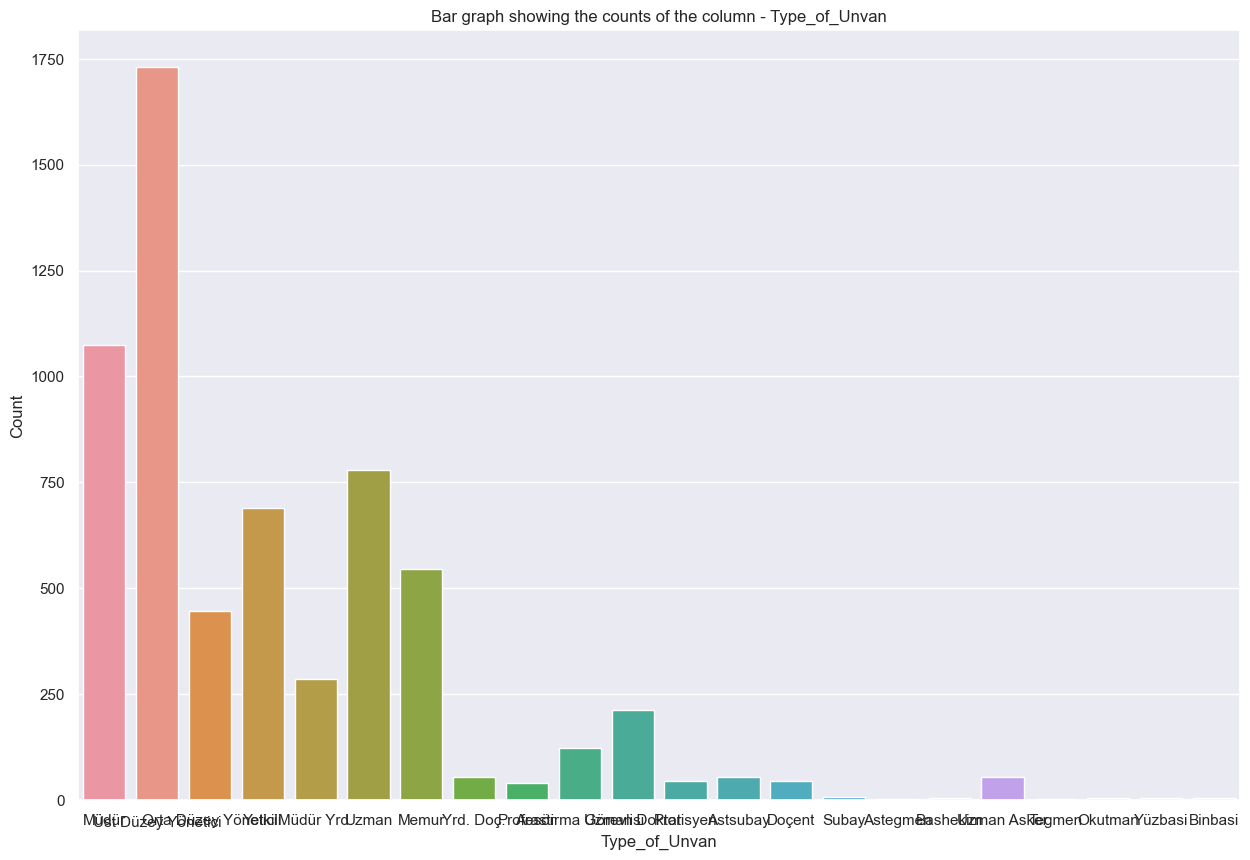

In [200]:
### Bar graph showing the counts of the column - Type_of_Unvan

sns.set(rc = {'figure.figsize': (15, 10)})
sns.barplot(x= list(unvan_type_dict.keys()), y= list(unvan_type_dict.values()))
plt.title('Bar graph showing the counts of the column - Type_of_Unvan')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Type_of_Unvan', fontsize = 12)

In [201]:
### Value counts of the column - Risk Grubu

credit_risk_count = dataset['Risk_Grubu'].value_counts(dropna = False)
credit_risk_count

Risk_Grubu
Az Riskli      5619
İyi            4668
Çok İyi        4177
Orta Riskli     921
Çok Riskli      766
Name: count, dtype: int64

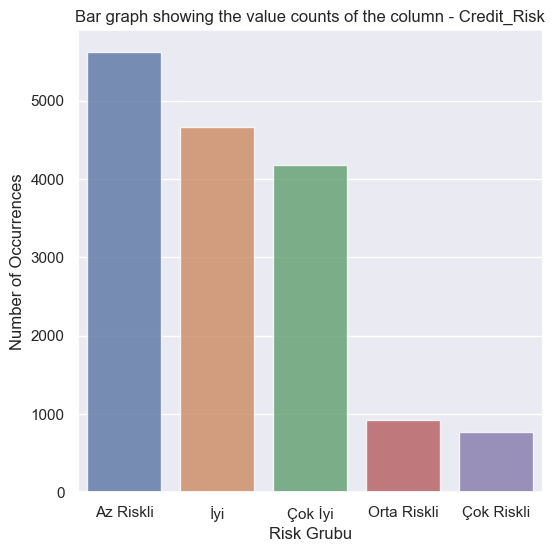

In [202]:
### Bar graph showing the value counts of the column - Risk Grubu

sns.set(rc = {'figure.figsize': (6, 6)})
sns.barplot(x= credit_risk_count.index, y = credit_risk_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Credit_Risk')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Risk Grubu', fontsize = 12)
plt.show()

In [203]:
### Value counts of the column - Maas Belgeli

maas_count = dataset['Maas_Belgeli'].value_counts(dropna = False)
maas_count

Maas_Belgeli
2100     388
2200     358
2000     356
1900     353
1800     347
        ... 
18600      8
14000      7
11200      7
10400      6
24900      5
Name: count, Length: 321, dtype: int64

Text(0.5, 1.0, 'Customer Age Distribution')

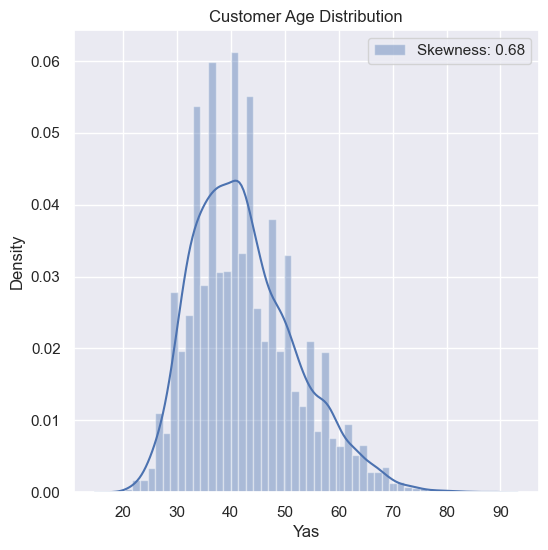

In [204]:
### Understanding the distribution of the column - Yas

sns.distplot(dataset['Yas'], label = 'Skewness: %.2f'%(dataset['Yas'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')

Text(0.5, 1.0, 'Customer Monthly Salary Distribution')

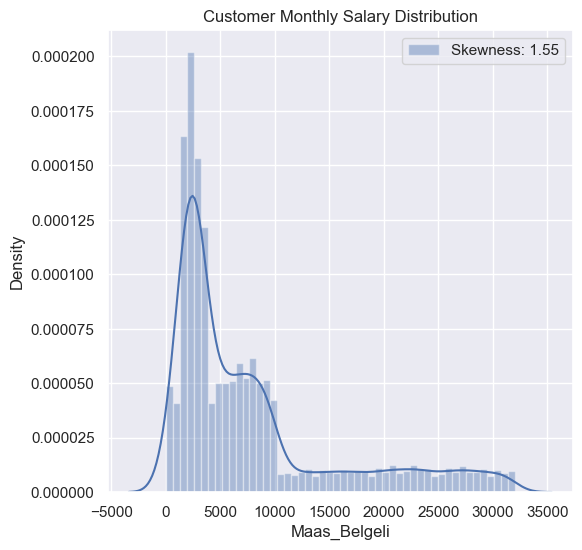

In [205]:
### Understanding the distribution of the column - Maas_Belgeli

sns.distplot(dataset['Maas_Belgeli'], label = 'Skewness: %.2f'%(dataset['Maas_Belgeli'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Salary Distribution')

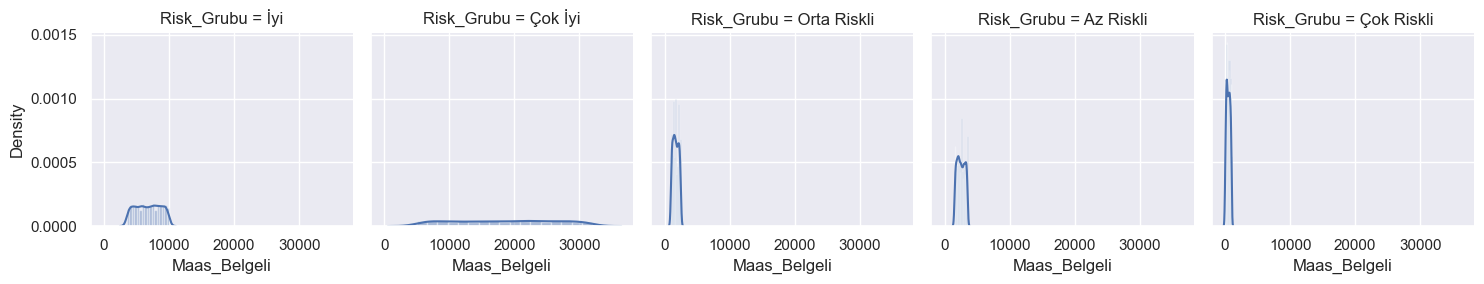

In [206]:
### Monthly Inhand Salary distribution by Risk Grubu

grid = sns.FacetGrid(dataset, col = 'Risk_Grubu')
grid.map(sns.distplot, 'Maas_Belgeli')

Text(0.5, 1.0, '')

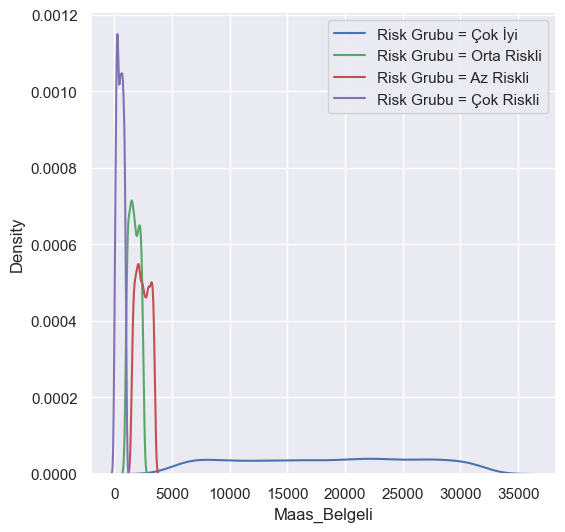

In [207]:
sns.kdeplot(dataset['Maas_Belgeli'][dataset['Risk_Grubu'] == 'Çok İyi'], label = 'Risk Grubu = Çok İyi')
sns.kdeplot(dataset['Maas_Belgeli'][dataset['Risk_Grubu'] == 'iyi'], label = 'Risk Grubu = iyi')
sns.kdeplot(dataset['Maas_Belgeli'][dataset['Risk_Grubu'] == 'Orta Riskli'], label = 'Risk Grubu = Orta Riskli')
sns.kdeplot(dataset['Maas_Belgeli'][dataset['Risk_Grubu'] == 'Az Riskli'], label = 'Risk Grubu = Az Riskli')
sns.kdeplot(dataset['Maas_Belgeli'][dataset['Risk_Grubu'] == 'Çok Riskli'], label = 'Risk Grubu = Çok Riskli')
plt.xlabel('Maas_Belgeli')
plt.legend()
plt.title('')

4. Data preprocessing

4.1 Detect and remove outliers in numerical variables

In [208]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

numerical_columns = list(dataset.select_dtypes('number').columns)
print('Numerical columns: {}'.format(numerical_columns))
outliers_to_drop = detect_outliers(dataset, 2, numerical_columns)
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

Numerical columns: ['Maas_Belgeli', 'Maas_Belgesiz', 'Diger_Belgesiz', 'Diger_Belgeli', 'Es_Belgeli', 'Es_Belgesiz', 'Yas', 'Ikametgah_Yili']
We will drop these 221 indices:  [564, 662, 873, 924, 953, 1267, 1689, 1792, 1984, 2126, 2232, 2536, 2621, 2832, 2909, 3146, 3559, 4049, 4124, 4130, 4141, 4305, 4323, 4671, 4796, 4824, 4962, 5027, 5112, 5192, 5489, 5742, 5878, 5959, 6084, 6113, 6271, 6336, 6339, 6469, 6656, 6977, 7087, 7217, 7263, 7330, 7434, 7455, 7481, 7618, 7917, 8067, 8521, 9126, 9223, 9685, 9759, 9867, 10119, 10305, 10471, 10571, 10734, 10865, 10928, 10990, 11246, 11276, 11864, 11876, 12091, 12275, 12370, 12438, 12547, 12558, 13031, 13198, 13421, 13677, 13760, 13883, 13941, 14037, 14092, 14183, 14188, 14206, 14261, 14391, 14464, 14516, 14646, 14835, 14984, 15037, 15093, 15165, 15292, 15320, 15432, 15451, 15487, 15532, 15542, 15843, 15876, 15881, 15883, 15893, 15947, 15950, 15953, 16015, 16036, 16085, 16091, 16102, 16112, 1329, 2343, 2439, 3163, 3371, 3696, 4419, 6410, 7903, 

In [209]:
dataset.iloc[outliers_to_drop, :]

,Maas_Belgeli,Maas_Belgesiz,Diger_Belgesiz,Diger_Belgeli,Es_Belgeli,Es_Belgesiz,Medeni_Durum,Cinsiyet,Egitim_Durumu,Unvani,...,Talebinin_Altında_Teklif_VarMi,Son_3_Ay_Icinde_Otomatik_Ret_Basvurusu_VarMi,Son_3_Ayda_Olumsuz_Istihbarattan_Dolayi_Ret_Edilmis_Teklifi_VarMi,Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi,KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi,Yazilmis_Cek_Kontrolu_UygunMu,Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu,Ikametgah_Yili,Oturdugu_Ev_Durumu,Risk_Grubu
564,21300,6505.07,0.0,0.0,5572.39,5572.39,Evli ...,Erkek ...,Fakülte/Lisans,Üst Düzey Yönetici,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,14,Kendine Ait,Çok İyi
662,20900,0.00,7000.0,0.0,0.00,0.00,Evli ...,Erkek ...,Fakülte/Lisans,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,6,Kendine Ait,Çok İyi
873,21300,0.00,0.0,0.0,0.00,0.00,Evli ...,Erkek ...,Fakülte/Lisans,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,34,Kendine Ait,Çok İyi
924,30300,0.00,0.0,0.0,0.00,0.00,Evli ...,Erkek ...,Fakülte/Lisans,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,20,Kendine Ait,Çok İyi
953,23300,2500.00,6500.0,6500.0,0.00,0.00,Evli ...,Erkek ...,Ilkögretim ...,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,10,Kendine Ait,Çok İyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,13300,6699.00,0.0,0.0,7700.00,7700.00,Evli ...,Erkek ...,Fakülte/Lisans,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,22,Kira,Çok İyi
8467,2000,15210.00,0.0,0.0,25000.00,25000.00,Evli ...,Erkek ...,Doktora ...,NaN,...,NaN,NaN,NaN,NaN,Hayir,NaN,NaN,10,Kendine Ait,Orta Riskli
14939,6600,2530.00,0.0,0.0,2000.00,2000.00,Evli ...,Erkek ...,Fakülte/Lisans,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,28,Kendine Ait,İyi
15917,300,8000.00,0.0,0.0,25000.00,25000.00,Evli ...,Kadin ...,Ortaögretim,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,30,Kendine Ait,Çok Riskli


In [210]:
### Drop outliers and reset index

print("Before: {} rows".format(len(dataset)))
dataset = dataset.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(dataset)))

Before: 16151 rows
After: 15930 rows


In [211]:
### Lets look at the new dataset

dataset

,Maas_Belgeli,Maas_Belgesiz,Diger_Belgesiz,Diger_Belgeli,Es_Belgeli,Es_Belgesiz,Medeni_Durum,Cinsiyet,Egitim_Durumu,Unvani,...,Talebinin_Altında_Teklif_VarMi,Son_3_Ay_Icinde_Otomatik_Ret_Basvurusu_VarMi,Son_3_Ayda_Olumsuz_Istihbarattan_Dolayi_Ret_Edilmis_Teklifi_VarMi,Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi,KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi,Yazilmis_Cek_Kontrolu_UygunMu,Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu,Ikametgah_Yili,Oturdugu_Ev_Durumu,Risk_Grubu
0,7600,0.00,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Fakülte/Lisans,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,5,Kendine Ait,İyi
1,7600,1.00,0.0,0.0,0.0,0.0,Evli ...,Kadin ...,Yüksek Lisans ...,Müdür,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,7,Kendine Ait,Çok İyi
2,18200,1.00,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Yüksek Lisans ...,Müdür,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,5,Kendine Ait,Çok İyi
3,4300,12452.00,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Fakülte/Lisans,Müdür,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,3,Diger,İyi
4,26900,10016.00,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Doktora ...,Üst Düzey Yönetici,...,NaN,NaN,NaN,NaN,Hayir,NaN,NaN,3,Kendine Ait,Çok İyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,5800,17485.24,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Fakülte/Lisans,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,10,Kendine Ait,Çok İyi
15926,6100,4000.00,0.0,0.0,0.0,0.0,Evli ...,Erkek ...,Ortaögretim,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,1,Kendine Ait,İyi
15927,4700,6100.00,0.0,0.0,0.0,0.0,Evli ...,Kadin ...,Fakülte/Lisans,NaN,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,10,Kendine Ait,İyi
15928,4400,6268.31,0.0,0.0,3150.0,3150.0,Evli ...,Erkek ...,Fakülte/Lisans,Uzman,...,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,Hayir,6,Kendine Ait,İyi


In [212]:
## Drop unnecessary columns

dataset.drop(['Maas_Belgesiz','Diger_Belgesiz','Diger_Belgeli', 'Son_3_Ayda_Olumsuz_Istihbarattan_Dolayi_Ret_Edilmis_Teklifi_VarMi', 'Es_Belgeli','Es_Belgesiz','Unvani', 'Dogdugu_Ulke', 'Son_3_Ay_Icinde_Otomatik_Ret_Basvurusu_VarMi', 'Yazilmis_Cek_Kontrolu_UygunMu'], axis = 1, inplace = True)
dataset

,Maas_Belgeli,Medeni_Durum,Cinsiyet,Egitim_Durumu,Meslegi,Sektor,Yas,Askerlik_Durumu,Talebinin_Altında_Teklif_VarMi,Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi,KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi,Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu,Ikametgah_Yili,Oturdugu_Ev_Durumu,Risk_Grubu
0,7600,Evli ...,Erkek ...,Fakülte/Lisans,Memur,Kamu Kurumu ...,50,Yapildi,Hayir,Hayir,Hayir,Hayir,5,Kendine Ait,İyi
1,7600,Evli ...,Kadin ...,Yüksek Lisans ...,Bankaci,Kamu Kurumu ...,51,Kadin,Hayir,Hayir,Hayir,Hayir,7,Kendine Ait,Çok İyi
2,18200,Evli ...,Erkek ...,Yüksek Lisans ...,Bankaci,Kamu Kurumu ...,45,Yapildi,Hayir,Hayir,Hayir,Hayir,5,Kendine Ait,Çok İyi
3,4300,Evli ...,Erkek ...,Fakülte/Lisans,Bankaci,Özel Kurum ...,40,Yapildi,Hayir,Hayir,Hayir,Hayir,3,Diger,İyi
4,26900,Evli ...,Erkek ...,Doktora ...,Danisman,Kamu Kurumu ...,53,Yapildi,NaN,NaN,Hayir,NaN,3,Kendine Ait,Çok İyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,5800,Evli ...,Erkek ...,Fakülte/Lisans,Hakim/Savci,Kamu Kurumu ...,43,Yapildi,Hayir,Hayir,Hayir,Hayir,10,Kendine Ait,Çok İyi
15926,6100,Evli ...,Erkek ...,Ortaögretim,Isçi,Özel Kurum ...,51,Muaf,Hayir,Hayir,Hayir,Hayir,1,Kendine Ait,İyi
15927,4700,Evli ...,Kadin ...,Fakülte/Lisans,Memur,Kamu Kurumu ...,47,Kadin,Hayir,Hayir,Hayir,Hayir,10,Kendine Ait,İyi
15928,4400,Evli ...,Erkek ...,Fakülte/Lisans,Pazarlamaci/Satis Elemani,Özel Kurum ...,32,Yapildi,Hayir,Hayir,Hayir,Hayir,6,Kendine Ait,İyi


In [213]:
### Looking at the missing values in the dataset

dataset.isnull().sum().sort_values(ascending = False)

Sektor                                                     879
Talebinin_Altında_Teklif_VarMi                             438
Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi    438
Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu        376
Maas_Belgeli                                                 0
Medeni_Durum                                                 0
Cinsiyet                                                     0
Egitim_Durumu                                                0
Meslegi                                                      0
Yas                                                          0
Askerlik_Durumu                                              0
KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi                   0
Ikametgah_Yili                                               0
Oturdugu_Ev_Durumu                                           0
Risk_Grubu                                                   0
dtype: int64

4.2.1 Handling missing values

In [214]:
### Looking at the unvan_type_dict

unvan_type_dict

{'Müdür': 1074,
 'Üst Düzey Yönetici': 1731,
 'Orta Düzey Yönetici': 447,
 'Yetkili': 689,
 'Müdür Yrd.': 285,
 'Uzman': 778,
 'Memur': 545,
 'Yrd. Doç.': 55,
 'Profesör': 40,
 'Arastirma Görevlisi': 124,
 'Uzman Doktor': 213,
 'Pratisyen': 46,
 'Astsubay': 55,
 'Doçent': 46,
 'Subay': 7,
 'Astegmen': 3,
 'Bashekim': 4,
 'Uzman Asker': 54,
 'Tegmen': 2,
 'Okutman': 5,
 'Yüzbasi': 4,
 'Binbasi': 6}

In [215]:
### Creating missing different lists for each Unvan

Mudur = [0] * (len(dataset))
Ust_Duzey_Yoneticisi = [0] * (len(dataset))
Orta_Duzey_Yoneticisi = [0] * (len(dataset))
Yetkili = [0] * (len(dataset))
Mudur_Yrd = [0] * (len(dataset))
Uzman = [0] * (len(dataset))
Memur = [0] * (len(dataset))
Yrd_Doc = [0] * (len(dataset))
Profesor = [0] * (len(dataset))
Arastirma_Gorevlisi = [0] * (len(dataset))
Uzman_Doktor = [0] * (len(dataset))
Pratisyen = [0] * (len(dataset))
Astsubay = [0] * (len(dataset))
Docent = [0] * (len(dataset))
Subay = [0] * (len(dataset))
Astegmen = [0] * (len(dataset))
Bashekim = [0] * (len(dataset))
Uzman_Asker = [0] * (len(dataset))
Tegmen = [0] * (len(dataset))
Okutman = [0] * (len(dataset))
Yuzbasi = [0] * (len(dataset))
Binbasi = [0] * (len(dataset))


In [216]:
### Using 0's and 1's if a customer has a particular Unvan

for index in range(len(Unvan_data)):
   
    if 'Müdür' in Unvan_data[index]:
        Mudur[index] = 1
    
    if 'Üst Düzey Yönetici' in Unvan_data[index]:
        Ust_Duzey_Yoneticisi[index] = 1
     
    if 'Orta Düzey Yönetici' in Unvan_data[index]:
        Orta_Duzey_Yoneticisi[index] = 1
    
    if 'Yetkili' in Unvan_data[index]:
        Yetkili[index] = 1
     
    if 'Müdür Yrd.' in Unvan_data[index]:
        Mudur_Yrd[index] = 1
    
    if 'Uzman' in Unvan_data[index]:
        Uzman[index] = 1
        
    if 'Memur' in Unvan_data[index]:
        Memur[index] = 1
    
    if 'Yrd. Doç.' in Unvan_data[index]:
        Yrd_Doc[index] = 1

    if 'Profesör' in Unvan_data[index]:
        Profesor[index] = 1
    
    if 'Arastirma Görevlisi' in Unvan_data[index]:
        Arastirma_Gorevlisi[index] = 1
        
    if 'Uzman Doktor' in Unvan_data[index]:
        Uzman_Doktor[index] = 1
     
    if 'Pratisyen' in Unvan_data[index]:
        Pratisyen[index] = 1

    if 'Astsubay' in Unvan_data[index]:
        Astsubay[index] = 1
        
    if 'Doçent' in Unvan_data[index]:
        Docent[index] = 1

    if 'Subay' in Unvan_data[index]:
        Subay[index] = 1

    if 'Astegmen' in Unvan_data[index]:
        Astegmen[index] = 1

    if 'Bashekim' in Unvan_data[index]:
        Bashekim[index] = 1
    
    if 'Uzman Asker' in Unvan_data[index]:
        Uzman_Asker[index] = 1
    
    if 'Tegmen' in Unvan_data[index]:
        Tegmen[index] = 1

    if 'Okutman' in Unvan_data[index]:
        Okutman[index] = 1
    
    if 'Yüzbasi' in Unvan_data[index]:
        Yuzbasi[index] = 1

    if 'Binbasi' in Unvan_data[index]:
        Binbasi[index] = 1

In [217]:
### Adding the new columns to the dataset

dataset['Mudur'] = Mudur
dataset['Ust_Duzey_Yoneticisi'] = Ust_Duzey_Yoneticisi
dataset['Orta_Duzey_Yoneticisi'] = Orta_Duzey_Yoneticisi
dataset['Yetkili'] = Yetkili
dataset['Mudur_Yrd'] = Mudur_Yrd
dataset['Uzman'] = Uzman
dataset['Memur'] = Memur
dataset['Yrd_Doc'] = Yrd_Doc
dataset['Profesor'] = Profesor
dataset['Arastirma_Gorevlisi'] = Arastirma_Gorevlisi
dataset['Uzman_Doktor'] = Uzman_Doktor
dataset['Pratisyen'] = Pratisyen
dataset['Astsubay'] = Astsubay
dataset['Docent'] = Docent
dataset['Subay'] = Subay
dataset['Astegmen'] = Astegmen
dataset['Bashekim'] = Bashekim
dataset['Uzman_Asker'] = Uzman_Asker
dataset['Tegmen'] = Tegmen
dataset['Okutman'] = Okutman
dataset['Yuzbasi'] = Yuzbasi
dataset['Binbasi'] = Binbasi

In [218]:
dataset

,Maas_Belgeli,Medeni_Durum,Cinsiyet,Egitim_Durumu,Meslegi,Sektor,Yas,Askerlik_Durumu,Talebinin_Altında_Teklif_VarMi,Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi,...,Astsubay,Docent,Subay,Astegmen,Bashekim,Uzman_Asker,Tegmen,Okutman,Yuzbasi,Binbasi
0,7600,Evli ...,Erkek ...,Fakülte/Lisans,Memur,Kamu Kurumu ...,50,Yapildi,Hayir,Hayir,...,0,0,0,0,0,0,0,0,0,0
1,7600,Evli ...,Kadin ...,Yüksek Lisans ...,Bankaci,Kamu Kurumu ...,51,Kadin,Hayir,Hayir,...,0,0,0,0,0,0,0,0,0,0
2,18200,Evli ...,Erkek ...,Yüksek Lisans ...,Bankaci,Kamu Kurumu ...,45,Yapildi,Hayir,Hayir,...,0,0,0,0,0,0,0,0,0,0
3,4300,Evli ...,Erkek ...,Fakülte/Lisans,Bankaci,Özel Kurum ...,40,Yapildi,Hayir,Hayir,...,0,0,0,0,0,0,0,0,0,0
4,26900,Evli ...,Erkek ...,Doktora ...,Danisman,Kamu Kurumu ...,53,Yapildi,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,5800,Evli ...,Erkek ...,Fakülte/Lisans,Hakim/Savci,Kamu Kurumu ...,43,Yapildi,Hayir,Hayir,...,0,0,0,0,0,0,0,0,0,0
15926,6100,Evli ...,Erkek ...,Ortaögretim,Isçi,Özel Kurum ...,51,Muaf,Hayir,Hayir,...,0,0,0,0,0,0,0,0,0,0
15927,4700,Evli ...,Kadin ...,Fakülte/Lisans,Memur,Kamu Kurumu ...,47,Kadin,Hayir,Hayir,...,0,0,0,0,0,0,0,0,0,0
15928,4400,Evli ...,Erkek ...,Fakülte/Lisans,Pazarlamaci/Satis Elemani,Özel Kurum ...,32,Yapildi,Hayir,Hayir,...,0,0,0,0,0,0,0,0,0,0


In [219]:
### Finding the median value of the column - Ikametgah Yılı

Ikametgah_Yili_index = list(~dataset['Ikametgah_Yili'].isnull())
median_Ikametgah_Yili= np.median(dataset['Ikametgah_Yili'].loc[Ikametgah_Yili_index])

### Replacing the missing values of the column - Ikametgah Yılı

dataset['Ikametgah_Yili'].fillna(median_Ikametgah_Yili, inplace = True)

In [220]:
index_values = ~dataset['Sektor'].isnull().values
Sektor_data = list(dataset['Sektor'][index_values])

Kamu_Kurumu = [0] * (len(dataset))
Ozel_Kurum = [0] * (len(dataset))

for index in range(len(Sektor_data)):
   
    if 'Kamu Kurumu' in Sektor_data[index]:
        Kamu_Kurumu[index] = 1
    
    if 'Özel Kurum' in Sektor_data[index]:
        Ozel_Kurum[index] = 1


dataset['Kamu_Kurumu'] = Kamu_Kurumu
dataset['Ozel_Kurum'] = Ozel_Kurum


dataset.drop(['Sektor'], axis = 1, inplace = True)

In [221]:
index_values = ~dataset['Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi'].isnull().values
RetTahsis_data = list(dataset['Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi'][index_values])

RetTahsis_Evet = [0] * (len(dataset))
RetTahsis_Hayir = [0] * (len(dataset))


for index in range(len(RetTahsis_data)):
   
    if 'Evet' in RetTahsis_data[index]:
        RetTahsis_Evet[index] = 1
    
    if 'Hayir' in RetTahsis_data[index]:
        RetTahsis_Hayir[index] = 1

dataset['RetTahsis_Evet'] = RetTahsis_Evet
dataset['RetTahsis_Hayir'] = RetTahsis_Hayir


dataset.drop(['Son_1_Yil_Icinde_GM_Tarafindan_Ret_Edilmis_Tahsis_VarMi'], axis = 1, inplace = True)

In [222]:
index_values = ~dataset['Talebinin_Altında_Teklif_VarMi'].isnull().values
TalepAltiTeklif_data = list(dataset['Talebinin_Altında_Teklif_VarMi'][index_values])

TalepAltiTeklif_Evet = [0] * (len(dataset))
TalepAltiTeklif_Hayir = [0] * (len(dataset))


for index in range(len(TalepAltiTeklif_data)):
   
    if 'Evet' in TalepAltiTeklif_data[index]:
        TalepAltiTeklif_Evet[index] = 1
    
    if 'Hayir' in TalepAltiTeklif_data[index]:
        TalepAltiTeklif_Hayir[index] = 1


dataset['TalepAltiTeklif_Evet'] = TalepAltiTeklif_Evet
dataset['TalepAltiTeklif_Hayir'] = TalepAltiTeklif_Hayir


dataset.drop(['Talebinin_Altında_Teklif_VarMi'], axis = 1, inplace = True)

In [223]:
index_values = ~dataset['KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi'].isnull().values
KanuniTakip_data = list(dataset['KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi'][index_values])

KanuniTakip_Evet = [0] * (len(dataset))
KanuniTakip_Hayir = [0] * (len(dataset))


for index in range(len(KanuniTakip_data)):
   
    if 'Evet' in KanuniTakip_data[index]:
        KanuniTakip_Evet[index] = 1
    
    if 'Hayir' in KanuniTakip_data[index]:
        KanuniTakip_Hayir[index] = 1


dataset['KanuniTakip_Evet'] = KanuniTakip_Evet
dataset['KanuniTakip_Hayir'] = KanuniTakip_Hayir


dataset.drop(['KKB_Sorgusunda_Kanuni_Takibi_Sorunu_Var_Mi'], axis = 1, inplace = True)

In [224]:
index_values = ~dataset['Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu'].isnull().values
IcraTakip_data = list(dataset['Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu'][index_values])

IcraTakip_Evet = [0] * (len(dataset))
IcraTakip_Hayir = [0] * (len(dataset))


for index in range(len(IcraTakip_data)):
   
    if 'Evet' in IcraTakip_data[index]:
        IcraTakip_Evet[index] = 1
    
    if 'Hayir' in IcraTakip_data[index]:
        IcraTakip_Hayir[index] = 1


dataset['IcraTakip_Evet'] = IcraTakip_Evet
dataset['IcraTakip_Hayir'] = IcraTakip_Hayir


dataset.drop(['Müsteri_Terkin_Olmus_Avukat_Icra_Takibine_Dusmus_Mu'], axis = 1, inplace = True)

In [225]:
dataset

,Maas_Belgeli,Medeni_Durum,Cinsiyet,Egitim_Durumu,Meslegi,Yas,Askerlik_Durumu,Ikametgah_Yili,Oturdugu_Ev_Durumu,Risk_Grubu,...,Kamu_Kurumu,Ozel_Kurum,RetTahsis_Evet,RetTahsis_Hayir,TalepAltiTeklif_Evet,TalepAltiTeklif_Hayir,KanuniTakip_Evet,KanuniTakip_Hayir,IcraTakip_Evet,IcraTakip_Hayir
0,7600,Evli ...,Erkek ...,Fakülte/Lisans,Memur,50,Yapildi,5,Kendine Ait,İyi,...,1,0,0,1,0,1,0,1,0,1
1,7600,Evli ...,Kadin ...,Yüksek Lisans ...,Bankaci,51,Kadin,7,Kendine Ait,Çok İyi,...,1,0,0,1,0,1,0,1,0,1
2,18200,Evli ...,Erkek ...,Yüksek Lisans ...,Bankaci,45,Yapildi,5,Kendine Ait,Çok İyi,...,1,0,0,1,0,1,0,1,0,1
3,4300,Evli ...,Erkek ...,Fakülte/Lisans,Bankaci,40,Yapildi,3,Diger,İyi,...,0,1,0,1,0,1,0,1,0,1
4,26900,Evli ...,Erkek ...,Doktora ...,Danisman,53,Yapildi,3,Kendine Ait,Çok İyi,...,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15925,5800,Evli ...,Erkek ...,Fakülte/Lisans,Hakim/Savci,43,Yapildi,10,Kendine Ait,Çok İyi,...,0,0,0,0,0,0,0,1,0,0
15926,6100,Evli ...,Erkek ...,Ortaögretim,Isçi,51,Muaf,1,Kendine Ait,İyi,...,0,0,0,0,0,0,0,1,0,0
15927,4700,Evli ...,Kadin ...,Fakülte/Lisans,Memur,47,Kadin,10,Kendine Ait,İyi,...,0,0,0,0,0,0,0,1,0,0
15928,4400,Evli ...,Erkek ...,Fakülte/Lisans,Pazarlamaci/Satis Elemani,32,Yapildi,6,Kendine Ait,İyi,...,0,0,0,0,0,0,0,1,0,0


Data Transform

Text(0.5, 1.0, 'Maas_Belgeli')

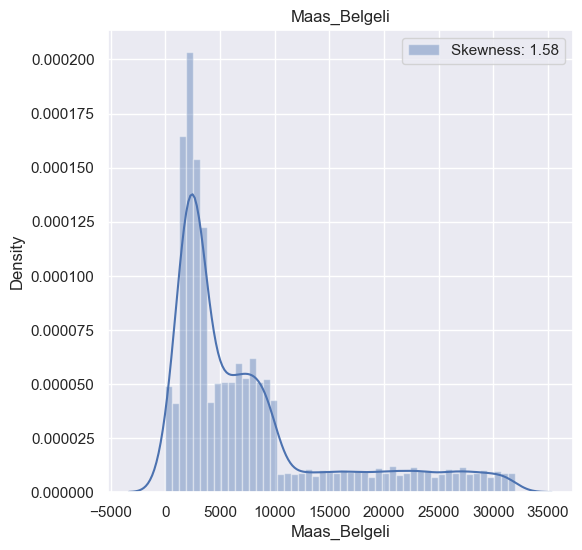

In [226]:
### Understanding the distribution of the column - Maas_Belgeli

sns.distplot(dataset['Maas_Belgeli'], label = 'Skewness: %.2f'%(dataset['Maas_Belgeli'].skew()))
plt.legend(loc = 'best')
plt.title('Maas_Belgeli')

Text(0.5, 1.0, 'Maas_Belgeli')

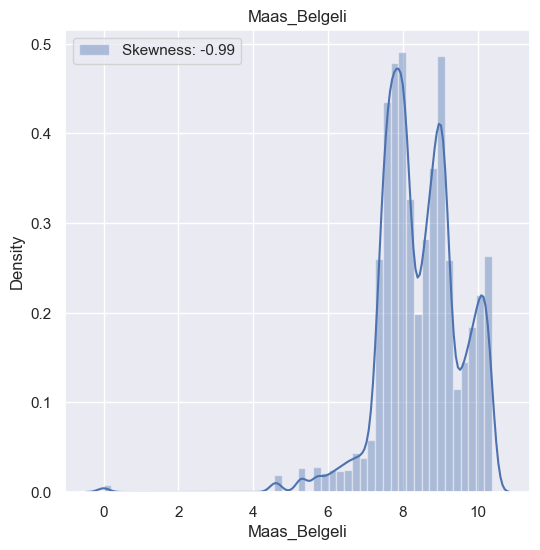

In [227]:
### Understanding the distribution of the data log(Maas_Belgeli)

modified_x = [np.log(x) if x > 0 else 0 for x in dataset['Maas_Belgeli']]
dataset['Maas_Belgeli'] = modified_x

sns.distplot(dataset['Maas_Belgeli'], label = 'Skewness: %.2f'%(dataset['Maas_Belgeli'].skew()))
plt.legend(loc = 'best')
plt.title('Maas_Belgeli')

Text(0.5, 1.0, 'Yas')

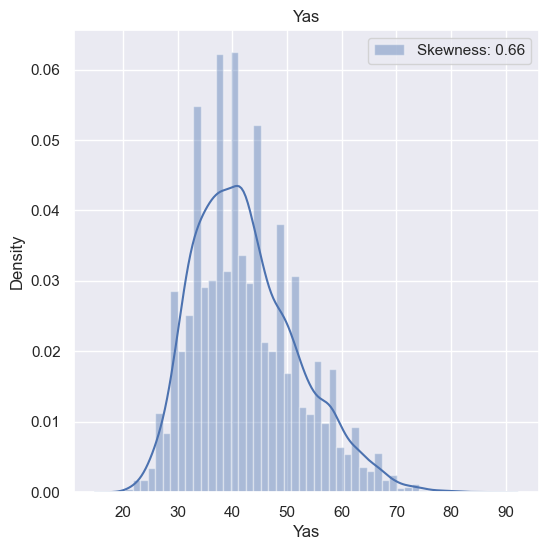

In [228]:
### Understanding the distribution of the column - Yas

sns.distplot(dataset['Yas'], label = 'Skewness: %.2f'%(dataset['Yas'].skew()))
plt.legend(loc = 'best')
plt.title('Yas')

Text(0.5, 1.0, 'Yas')

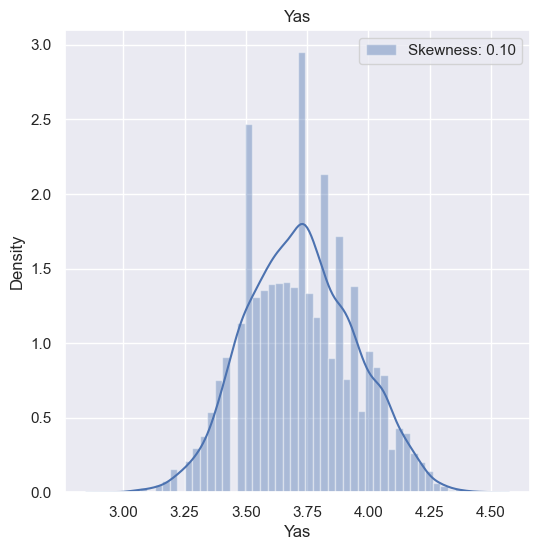

In [229]:
### Understanding the distribution of the data log(Yas)

modified_x = [np.log(x) if x > 0 else 0 for x in dataset['Yas']]
dataset['Yas'] = modified_x

sns.distplot(dataset['Yas'], label = 'Skewness: %.2f'%(dataset['Yas'].skew()))
plt.legend(loc = 'best')
plt.title('Yas')

In [230]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15930 entries, 0 to 15929
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Maas_Belgeli           15930 non-null  float64 
 1   Medeni_Durum           15930 non-null  category
 2   Cinsiyet               15930 non-null  category
 3   Egitim_Durumu          15930 non-null  category
 4   Meslegi                15930 non-null  category
 5   Yas                    15930 non-null  float64 
 6   Askerlik_Durumu        15930 non-null  category
 7   Ikametgah_Yili         15930 non-null  int64   
 8   Oturdugu_Ev_Durumu     15930 non-null  object  
 9   Risk_Grubu             15930 non-null  object  
 10  Mudur                  15930 non-null  int64   
 11  Ust_Duzey_Yoneticisi   15930 non-null  int64   
 12  Orta_Duzey_Yoneticisi  15930 non-null  int64   
 13  Yetkili                15930 non-null  int64   
 14  Mudur_Yrd              15930 non-null 

Feature Encoding

In [231]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols=["Medeni_Durum", "Cinsiyet", "Egitim_Durumu", "Meslegi", "Askerlik_Durumu",
      "Oturdugu_Ev_Durumu", "Risk_Grubu" ]
for i in cols:
  dataset[i]=le.fit_transform(dataset[i])


In [233]:
### One Hot Encoding the columns 

encoded_dataset = pd.get_dummies(data = dataset, columns = ['Medeni_Durum', 'Cinsiyet', 'Egitim_Durumu', 'Meslegi', 'Askerlik_Durumu', 'Oturdugu_Ev_Durumu'])
encoded_dataset = encoded_dataset

In [234]:
encoded_dataset.isnull().sum()

Maas_Belgeli            0
Yas                     0
Ikametgah_Yili          0
Risk_Grubu              0
Mudur                   0
                       ..
Oturdugu_Ev_Durumu_0    0
Oturdugu_Ev_Durumu_1    0
Oturdugu_Ev_Durumu_2    0
Oturdugu_Ev_Durumu_3    0
Oturdugu_Ev_Durumu_4    0
Length: 120, dtype: int64

Modelling

In [235]:
encoded_dataset['Risk_Grubu'] = encoded_dataset.pop('Risk_Grubu')

In [236]:
### Splitting the data to the matrices X and Y using the training set.

X = encoded_dataset.iloc[:, : -1].values
y = encoded_dataset.iloc[:, -1].values

In [237]:
# Normalize (standardize) data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
#data augmentation
sm = SMOTE(random_state = 42) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 
X_test_res, y_test_res = sm.fit_resample(X_test, y_test.ravel()) 

In [240]:
# Creating Model
model = Sequential()
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(units=32, activation='sigmoid'))

# Compiling model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


#sparse_categorical_crossentropy softmax 

# Taaining model
history = model.fit(X_train_res, y_train_res, epochs=10, batch_size=64, validation_data=(X_test_res, y_test_res))

Epoch 1/10


349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2850 - loss: 1.9691 - val_accuracy: 0.6810 - val_loss: 0.9348
Epoch 2/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6973 - loss: 0.8151 - val_accuracy: 0.8283 - val_loss: 0.5504
Epoch 3/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8107 - loss: 0.5111 - val_accuracy: 0.8412 - val_loss: 0.4286
Epoch 4/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8370 - loss: 0.4144 - val_accuracy: 0.8441 - val_loss: 0.3910
Epoch 5/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8422 - loss: 0.3706 - val_accuracy: 0.8459 - val_loss: 0.3733
Epoch 6/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8576 - loss: 0.3373 - val_accuracy: 0.8382 - val_loss: 0.3656
Epoch 7/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8592 - loss: 0.3299 - val_accuracy: 0.8470 - val_loss: 0.3556
Epoch 8/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8610 - loss: 0.3189 - val_accuracy: 0.8504 - val_

In [241]:
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │        15,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,090 (301.14 KB)

 Trainable params: 25,696 (100.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 51,394 (200.76 KB)

None


In [245]:
plot_model(model, to_file='model.png')
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=96)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


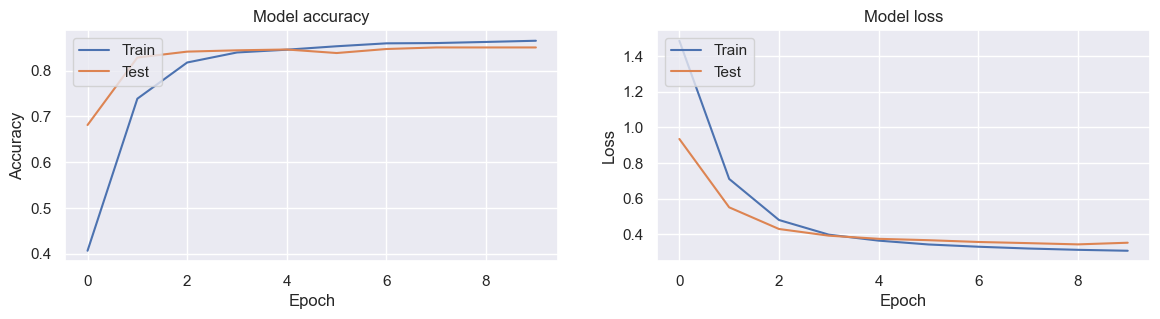

In [243]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()